# libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import f_classif , RFE
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Dataset And Exploration

In [501]:
cancer_data = load_breast_cancer()
data = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
data['target'] = cancer_data.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [503]:
data.describe() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**Missing values**

In [504]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

**Searching for duplicated rows**

In [505]:
data.duplicated().sum()

np.int64(0)

Number of samples: 569
Number of features : 30
Column names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']
Target variable distribution:
target
1    357
0    212
Name: count, dtype: int64


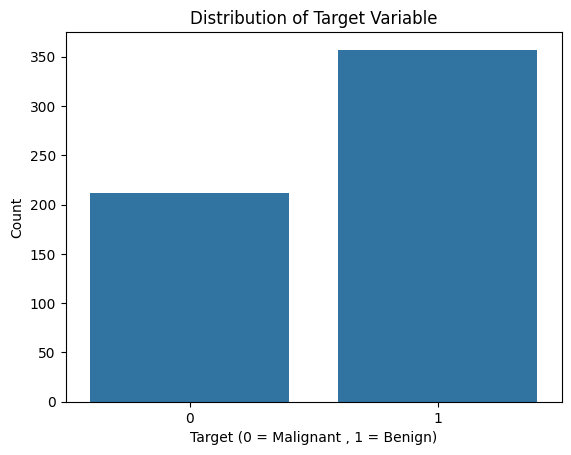

In [506]:
print(f'Number of samples: {data.shape[0]}')
print(f'Number of features : {data.shape[1] - 1}')
print(f'Column names: {list(data.columns)}')
print(f'Target variable distribution:\n{data["target"].value_counts()}')

sns.countplot(x='target', data=data )
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0 = Malignant , 1 = Benign)')
plt.ylabel('Count')
plt.show()

# Visualize Feature Distributions

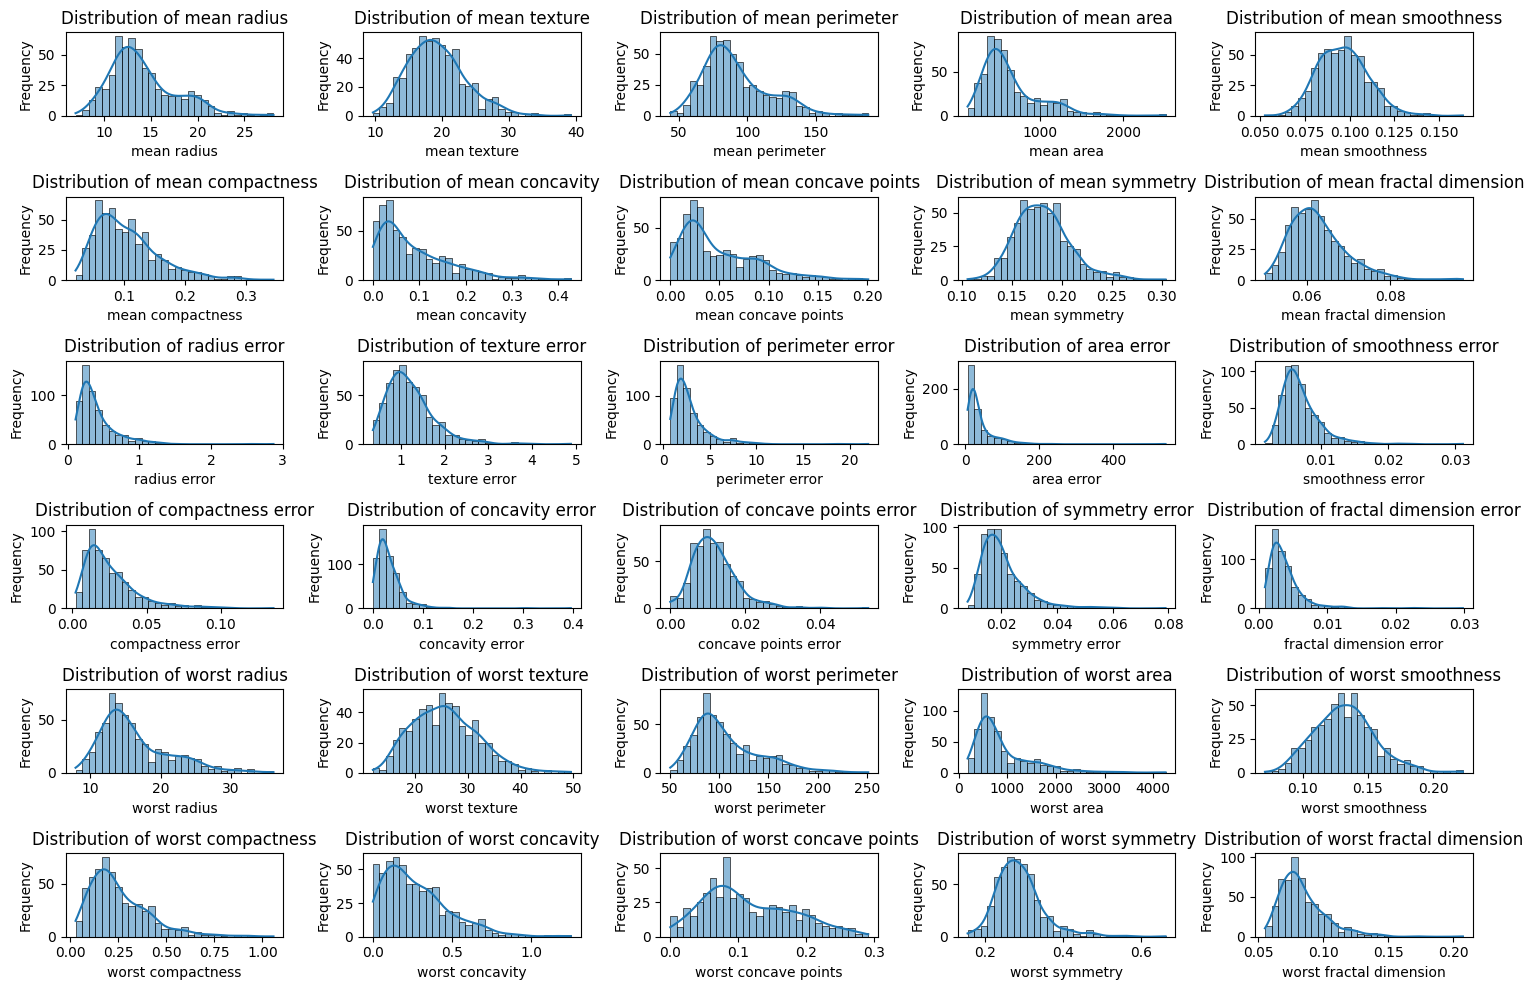

In [507]:
plt.figure(figsize=(15, 10))
for i,col in enumerate(data.columns[:-1]):
    plt.subplot(6, 5, i+1)
    sns.histplot(data[col], kde=True, bins=30 )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Summary
======================
* Number of samples: 569
* 31 columns, 30 features , all numerical
* Target variable: malignant (0) and benign (1) 
* Target values counts:-
     * 1  -->  357 value
     * 0  -->  212 value
* No missing values
* No duplicated data

======================

# Feature Selection


In [508]:
# split features and target
x = data.drop('target', axis=1)
y = data['target']

# Perform ANOVA 
f_values, p_values = f_classif(x, y) 
for i ,feature in enumerate(x.columns):
    print(f'{i+1}- Feature: {feature}, F-value: {f_values[i]:.2f} , p-value: {p_values[i]:.4f}')

1- Feature: mean radius, F-value: 646.98 , p-value: 0.0000
2- Feature: mean texture, F-value: 118.10 , p-value: 0.0000
3- Feature: mean perimeter, F-value: 697.24 , p-value: 0.0000
4- Feature: mean area, F-value: 573.06 , p-value: 0.0000
5- Feature: mean smoothness, F-value: 83.65 , p-value: 0.0000
6- Feature: mean compactness, F-value: 313.23 , p-value: 0.0000
7- Feature: mean concavity, F-value: 533.79 , p-value: 0.0000
8- Feature: mean concave points, F-value: 861.68 , p-value: 0.0000
9- Feature: mean symmetry, F-value: 69.53 , p-value: 0.0000
10- Feature: mean fractal dimension, F-value: 0.09 , p-value: 0.7599
11- Feature: radius error, F-value: 268.84 , p-value: 0.0000
12- Feature: texture error, F-value: 0.04 , p-value: 0.8433
13- Feature: perimeter error, F-value: 253.90 , p-value: 0.0000
14- Feature: area error, F-value: 243.65 , p-value: 0.0000
15- Feature: smoothness error, F-value: 2.56 , p-value: 0.1103
16- Feature: compactness error, F-value: 53.25 , p-value: 0.0000
17- Fe

**I'm going to drop the features that have a p-value higher than 0.005.**
- The features are:-
    * mean fractal dimension (p = 0.7599)
    * texture error (p = 0.8433)
    * smoothness error (p = 0.1103)
    * symmetry error (p = 0.8766)
    * fractal dimension error (p = 0.0631)


In [ ]:
# dropping features with high p-values 
drop_features = ['mean fractal dimension', 'texture error', 'smoothness error', 'symmetry error', 'fractal dimension error'] 
x = x.drop(columns=drop_features)

**Now the features have become 25 instead of 30**

In [510]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Train-test split

In [511]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling train and test data

In [512]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Feature Selection using RFE


In [ ]:
# RFE with SVC
svc = SVC(kernel='linear')   
rfe = RFE(estimator=svc, n_features_to_select=18)  
rfe.fit(x_train, y_train)

# Transform train and test data
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)
svc.fit(x_train_rfe, y_train)

# Selected features
selected_features = list(x.columns[rfe.support_]) 
print(f'Selected features: {selected_features}')  

Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'area error', 'compactness error', 'concavity error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity', 'worst symmetry']


# The Final Train And Test Data



In [514]:
x_train_final = x_train_rfe
x_test_final = x_test_rfe

=================================

**the final selected features are 18 features**

==================================

# Model Training With Default Hyperparameters

## 1 - KNN

In [515]:
knn_model_1 = KNeighborsClassifier()
knn_model_1.fit(x_train_final, y_train)
y_pred_knn_1 = knn_model_1.predict(x_test_final)

## 2 - SVM

In [516]:

svm_model_1 = SVC()
svm_model_1.fit(x_train_final, y_train)
y_pred_svm_1 = svm_model_1.predict(x_test_final)

**Evaluation Function**

In [517]:
def evaluate_model(y_test, y_pred):
    print("Classification Report:")
    print('=='*30)
    print(classification_report(y_test, y_pred))  
    print('=='*30)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print('=='*30)
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#  Default Hyperparameters Model Evaluation

**KNN Model Evaluation**

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193

Confusion Matrix:


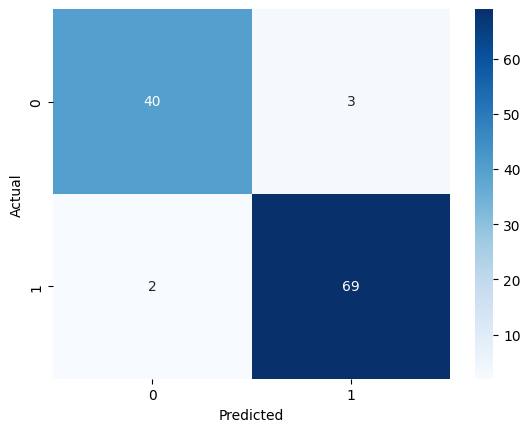

In [518]:
evaluate_model(y_test, y_pred_knn_1)

**SVM Model Evaluation:**

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158

Confusion Matrix:


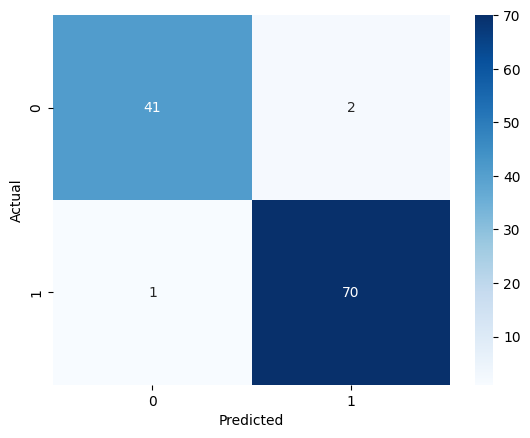

In [519]:
evaluate_model(y_test, y_pred_svm_1)

==============================================================================================
## Summary: Model Comparison (Default Parameters)

### KNN
- Accuracy: 95.6%  
- Precision: 0.95 / 0.96  
- Recall: 0.93 / 0.97  
- F1: 0.94 / 0.97  

### SVM
- Accuracy: 97.4%  
- Precision: 0.98 / 0.97  
- Recall: 0.95 / 0.99  
- F1: 0.96 / 0.98  

### Conclusion
SVM performs better than KNN with higher accuracy and more balanced precision/recall.

==============================================================================================



# Hyperparameter Tuning with Grid Search

## 1- KNN

**Grid Search**

In [520]:
model = KNeighborsClassifier()
knn_parameters = {'n_neighbors': range(1,11),
              'p': [1,2] 
              }

grid_search_knn = GridSearchCV(model, knn_parameters, cv=5)
grid_search_knn.fit(x_train_final, y_train)
print(f' The best parameters are: {grid_search_knn.best_params_}')

 The best parameters are: {'n_neighbors': 4, 'p': 1}


**Model Training after Hyperparameter Tuning**

In [521]:
knn_model_2 = KNeighborsClassifier(n_neighbors=4, p=1)
knn_model_2.fit(x_train_final, y_train)
y_pred_knn_2 = knn_model_2.predict(x_test_final)

## 2- SVM

**Grid Search**

In [522]:
model = SVC()
svm_parameters = {'kernel': ['linear', 'rbf'],
                  'gamma':['scale', 'auto',0.001, 0.01, 0.1, 1, 10],
                  'C': [0.1, 1, 10, 100]
}

grid_search_svm = GridSearchCV(model, svm_parameters, cv=5)
grid_search_svm.fit(x_train_final, y_train)
print(f' The best parameters are: {grid_search_svm.best_params_}')

 The best parameters are: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


**Model Training after Hyperparameter Tuning**

In [523]:
svm_model_2 = SVC(kernel='rbf', gamma=0.01, C=10)
svm_model_2.fit(x_train_final, y_train)
y_pred_svm_2 = svm_model_2.predict(x_test_final)

# Model Evaluation After Hyperparameter Tuning

**KNN Model Evaluation**

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.9649122807017544

Confusion Matrix:


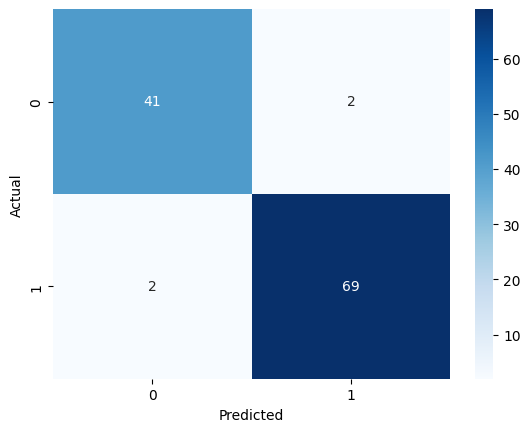

In [524]:
evaluate_model(y_test, y_pred_knn_2)

**SVM Model Evaluation**

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9824561403508771

Confusion Matrix:


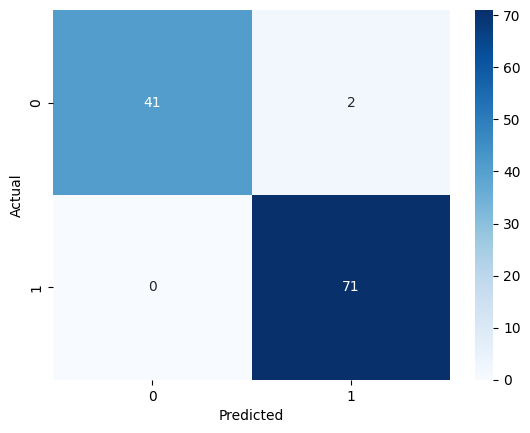

In [525]:
evaluate_model(y_test, y_pred_svm_2)

=========================================================================
## Model Comparison after Tuning Summary:

### KNN
- Accuracy: 96.5%  
- Precision: 0.95 / 0.97  
- Recall: 0.95 / 0.97  
- F1: 0.95–0.97  

### SVM
- Accuracy: 98.2%  
- Precision: 1.00 / 0.97  
- Recall: 0.95 / 1.00  
- F1: 0.98–0.99  

### Conclusion
SVM outperforms KNN after hyperparameter tuning, achieving higher accuracy and better precision/recall balance.

=========================================================================
